# Resolução Ex03 - Histograma e Transformações de intensidade
 

## Parte 1 - Histograma

In [46]:
%matplotlib inline
from matplotlib import pyplot as plt
import numpy as np
from scipy import stats
import matplotlib.image as mpimg
from PIL import Image

In [47]:
def h2stats(h):

    hn = 1.0*h/h.sum() # compute the normalized image histogram
    v = np.zeros(6) # number of statistics

    # compute statistics
    n = len(h) # number of gray values
    v[0]  = np.sum((np.arange(n)*hn)) # mean
    v[1]  = np.sum(np.power((np.arange(n)-v[0]),2)*hn) # variance
    v[2]  = np.sum(np.power((np.arange(n)-v[0]),3)*hn)/(np.power(v[1],1.5))# skewness
    v[3]  = np.sum(np.power((np.arange(n)-v[0]),4)*hn)/(np.power(v[1],2))-3# kurtosis
    v[4]  = -(hn[hn>0]*np.log(hn[hn>0])).sum() # entropy
    v[5]  = np.argmax(h) # mode
    return v

Vamos agora fazer um teste, calculando o histograma usando a função np.histogram e depois calculando as estatísticas da imagem:

('histogram statistics using h2stats =', array([ 5.77777778,  7.50617284, -0.51254498, -0.16094616,  0.93688831,  5.        ]))
('fmax e fmin:', 0, 2)
('h:', array([1, 0, 0, 0, 0, 5, 0, 0, 0, 3]))
('numero de bins:', array([ 0. ,  0.2,  0.4,  0.6,  0.8,  1. ,  1.2,  1.4,  1.6,  1.8,  2. ]))


<Container object of 3 artists>

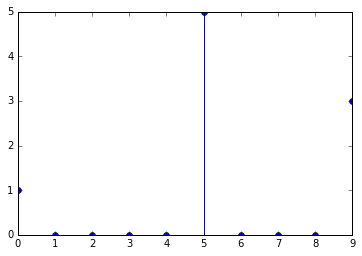

In [48]:
f = np.array([1,1,1,0,1,2,2,2,1])
h, bins = np.histogram(f)
print('histogram statistics using h2stats =', h2stats(h))
print('fmax e fmin:', f.min(), f.max())
print ('h:', h)
print ('numero de bins:', bins)
plt.stem(h)

Podemos observar o valor 'default' é igual a 10, portanto o numero de bins do histograma irá se ajustar para 10 valores em um intervalo de 0 a 2, o qual 2 é o maior valor de f. Podemos observar também, que os valores da escala de cinza são 3, portanto é preciso alterar o número de bins para valores maiores que os valores de cinza.


('histogram statistics using h2stats =', array([ 1.22222222,  0.39506173, -0.20992233, -0.62109375,  0.93688831,  1.        ]))
('h:', array([1, 5, 3]))
('numero de bins:', array([ 0.        ,  0.66666667,  1.33333333,  2.        ]))


<Container object of 3 artists>

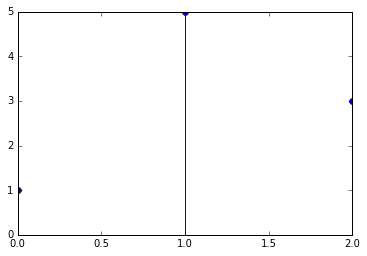

In [49]:
nbins = np.max(f)+1
h, bins = np.histogram(f, nbins)
print('histogram statistics using h2stats =', h2stats(h))

print ('h:', h)
print ('numero de bins:', bins)
plt.stem(h)

In [50]:
def stats_v2(f):
    v2 = np.zeros(6)

    v2[0] = np.mean(f)
    v2[1] = np.var(f)
    v2[2] = stats.skew(f)
    v2[3] = stats.kurtosis(f)
    v2[4] = stats.entropy(f, base=10)
    v2[5] = stats.mode(f)[0]
    
    return v2

Portanto agora podemos confirmar os valores utilizando as funções do scipy para comparar as estatisticas obtidas da imagem e do histograma.

In [51]:
print('histogram statistics =', h2stats(h))
print ('New image statistics =', stats_v2(f))

('histogram statistics =', array([ 1.22222222,  0.39506173, -0.20992233, -0.62109375,  0.93688831,  1.        ]))
('New image statistics =', array([ 1.22222222,  0.39506173, -0.20992233, -0.62109375,  0.87719451,  1.        ]))


## Parte 2 - Transformação de Intensidade

Tranformações de intensidade são valores de pixels alterados por uma determinada função de mapeamento.

In [52]:
x = np.arange(256)

#Tentei fazer minha própria normalização, não deu certo!
f = np.array([100., 500., 1000.])
g1 = (f - f.min())/(f.max()-f.min())
print (g1)

[ 0.          0.44444444  1.        ]


In [53]:
def normalize(f, range=[0,255]):

    f = np.asarray(f)
    range = np.asarray(range)
    if f.dtype.char in ['D', 'F']:
        raise Exception('error: cannot normalize complex data')
    faux = np.ravel(f).astype(float)
    minimum = faux.min()
    maximum = faux.max()
    lower = range[0]
    upper = range[1]
    if upper == lower:
        g = np.ones(f.shape) * maximum
    if minimum == maximum:
        g = np.ones(f.shape) * (upper + lower) / 2.
    else:
        g = (faux-minimum)*(upper-lower) / (maximum-minimum) + lower
    g = g.reshape(f.shape)

    if f.dtype == np.uint8:
        if upper > 255: 
            raise Exception('normalize: warning, upper valuer larger than 255. Cannot fit in uint8 image')
    if lower == 0 and upper == 255:
        g = g.astype(np.uint8)
    else:
        g = g.astype(f.dtype) # set data type of result the same as the input image
    return g

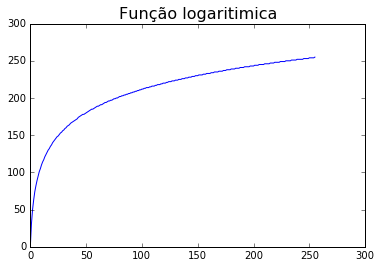

In [54]:
T = normalize(np.log(x+1))
f = mpimg.imread('../data/cameraman.tif')
f1 = T[f]

plt.plot(T)
plt.title(u'Função logaritimica', fontsize=16)
plt.show()

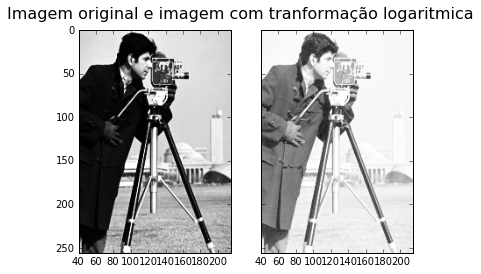

In [55]:
g, (ax1, ax2) = plt.subplots(1, 2, sharey=True)
g.suptitle(u'Imagem original e imagem com tranformação logaritmica', fontsize=16)
ax1.imshow(f, cmap='gray')
ax2.imshow(f1, cmap='gray')
plt.show()



Podemos observar nas imagens acima como alteramos as cores escuras devido a função ser logaritma

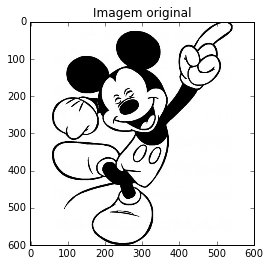

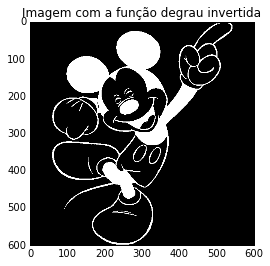

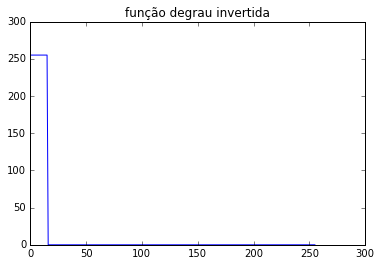

In [56]:
f2 = mpimg.imread('mc.jpeg')
img = Image.open('mickey.png')
plt.imshow(f2,cmap='gray')
plt.title('Imagem original')
plt.show()

T2 = normalize(T < 128)
f3 = T2[f2]
plt.imshow(f3,cmap='gray')
plt.title(u'Imagem com a função degrau invertida')
plt.show()

plt.plot(T2)
plt.title(u'função degrau invertida')
plt.show()

### Resolução do Exercício 3
Veja a imagem abaixo. Escolha um valor de limiar (threshold) para separar as bolachas do fundo da imagem. Dica: Visualize o histograma da imagem para escolher o valor. Crie primeiro uma função de transformação T e depois aplique esta transformação para obter o objeto de interesse (cookies) pintados de branco e o fundo em preto.

In [57]:
def histogram(f):

    return np.bincount(f.ravel())

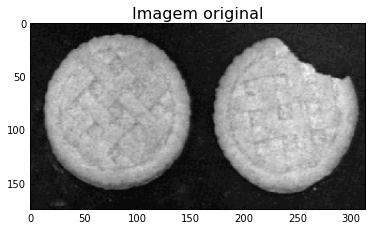

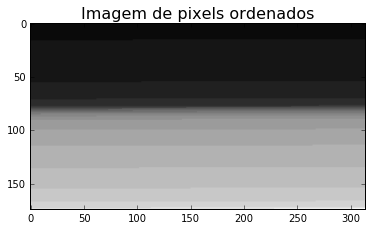

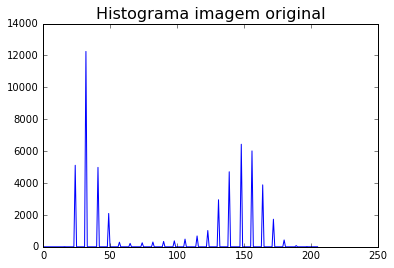

In [58]:
c = mpimg.imread('../figures/cookies.pgm')  
plt.imshow(c,cmap='gray')
plt.title('Imagem original', fontsize=16)
plt.show()

csort = np.sort(c.ravel()).reshape(c.shape)
plt.imshow(csort, cmap='gray')
plt.title('Imagem de pixels ordenados', fontsize=16)
plt.show()

h = histogram(c)
plt.title('Histograma imagem original', fontsize=16)
plt.plot(h)
plt.show()

Observando o o histograma acima, pode se observar maior quantidade de pixels em torno de 40 e 150.
Portanto foi utilizado um threshold de 70, sendo 0 os pixels menores que threshold e 1 os pixels maiores que o threshold.

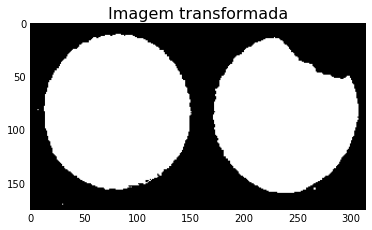

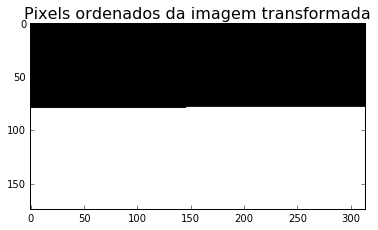

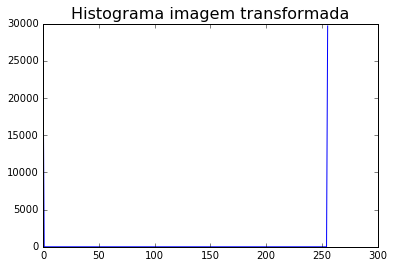

In [59]:
c [c > 70] = 255
c [c <= 70] = 0
g = c

plt.imshow(g, cmap='gray')
plt.title('Imagem transformada', fontsize=16)
plt.show()

gsort = np.sort(g.ravel()).reshape(g.shape)
plt.imshow(gsort, cmap='gray')
plt.title('Pixels ordenados da imagem transformada', fontsize=16)
plt.show()

hg = histogram(g)
plt.plot(hg)
plt.title('Histograma imagem transformada', fontsize=16)
plt.show()

Podemos observar o histograma da imagem transformada apenas com os valores de pixels em 0 e 255.

Observação: Eu tentei evitar as funções internas fornecidas pelo pacote ia898. Por exemplo, o nbshow.

### Resolução do Exercício 4
Você é capaz de transformar a imagem para identificar o número da placa do carro apresentado na imagem abaixo? 

(0.0, 0.67450982)


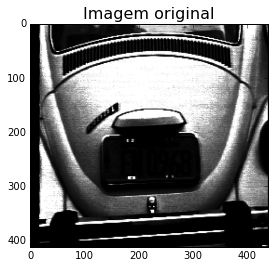

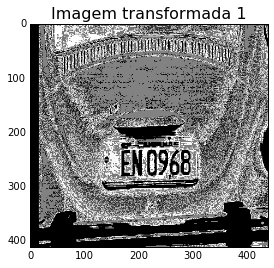

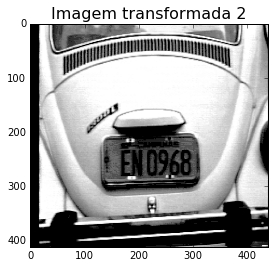

In [60]:
f = mpimg.imread('../figures/fusca.png')  

print(f.min(),f.max())

f=f*(255/f.max())
f=np.array(f).astype('uint8')

T = normalize(np.log(len(f+1)))
f2 = f * T

y = np.arange(len(f)+1)
T2 = normalize(np.log(y+1))
T2 = T2.astype('uint8')
f3 = T2[f]

plt.imshow(f,cmap='gray')
plt.title(u'Imagem original', fontsize=16)
plt.show()

plt.imshow(f2,cmap='gray')
plt.title(u'Imagem transformada 1', fontsize=16)
plt.show()

plt.imshow(f3,cmap='gray')
plt.title(u'Imagem transformada 2', fontsize=16)
plt.show()


O problema da imagem do fusca são os tons escuros na imgem, portanto o objetivo foi deixar a imagem mais clara. Para isso, utilizamos a função logaritmica. Como podemos observar, a imagem transformada 1 alcançou o objetivo de identificar a imagem, portanto a imagem ficou distorcida (não sei o porquê). Entretanto, quando eu utilizo uma função 'arange(len(f+1))', que representa a função identidade, junto com a função logaritmica eu obtenho a imagem transformada 2, que também alcançou o objetivo e ficou perfeitamente clara.

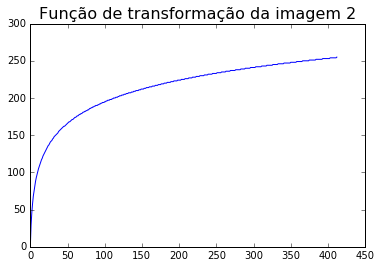

In [61]:
y = np.arange(len(f)+1)

T2 = normalize(np.log(y+1))
T2 = T2.astype('uint8')

plt.plot(T2)
plt.title(u'Função de transformação da imagem 2', fontsize=16)
plt.show()


###  Resolução do Exercício 5


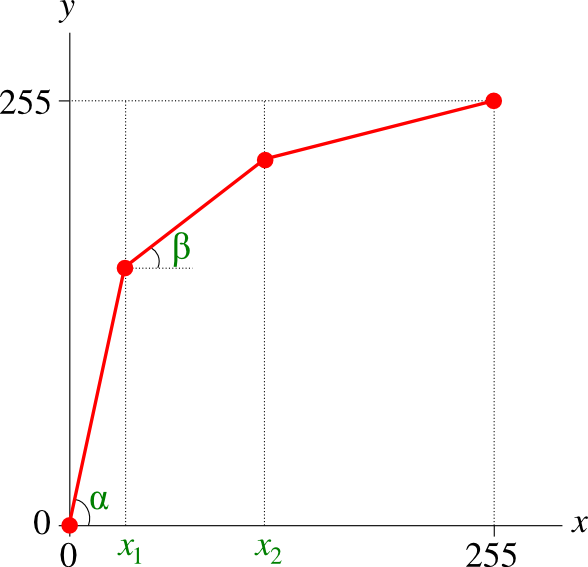

In [62]:
from PIL import Image
ang = Image.open('../figures/bc_angulos.png')
ang

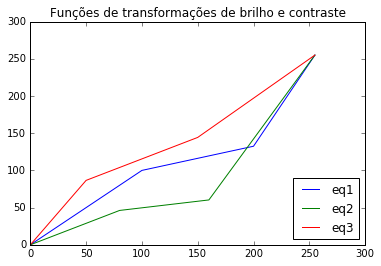

In [63]:
def equation(alpha,beta,x1,x2):
    y1=x1*np.tan(alpha)
    y2=np.tan(beta)*(x2-x1)+y1
    y3=255
    x3=255
    tgc=(y3-y2)/(x3-x2)
    
    T=np.zeros(256)
    T[0:x1]=y1+(y1/x1)*(np.arange(x1)-x1)
    T[x1:x2]=y2+(y2-y1)/(x2-x1)*(np.arange(x1,x2)-x2)
    T[x2:x3+1]=y3+tgc*(np.arange(x2,x3+1)-x3)
    
    
    return T

eq1 = equation((np.pi/4),(np.pi/10),100,200)
eq2 = equation((np.pi/6), (np.pi/18), 80, 160)
eq3 = equation((np.pi/3), (np.pi/6), 50, 150)

plt.plot(eq1, label = 'eq1')
plt.plot(eq2, label = 'eq2')
plt.plot(eq3, label = 'eq3')
plt.title(u'Funções de transformações de brilho e contraste')
plt.legend(loc = 'lower right')
plt.show()

Como visto em aula, essas função podem determinar o brilho e contrastes das imagens. E essas funções, podem ser determinadas com os valores dos angulos e os valores de x e y. Podemos observar também que os ângulos são dependentes. Como na atividade anterior, podemos notar que essas funções podem transformar os valores de brilho e contraste de imagens.

